In [1]:
import pandas as pd
import pandas_profiling
pd.read_csv('Sales.csv').profile_report()

In [2]:
import pandas as pd
d=pd.read_csv('Sales.csv')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
%matplotlib inline
d.shape

(270817, 7)

In [3]:
d.corr()

,CustomerId,TerritoryID,ProductID,UnitPrice,OrderQty
CustomerId,1.000000,0.090860,-0.037892,0.019343,0.056261
TerritoryID,0.090860,1.000000,-0.019608,0.008946,0.002424
ProductID,-0.037892,-0.019608,1.000000,-0.137802,-0.085002
UnitPrice,0.019343,0.008946,-0.137802,1.000000,-0.093917
OrderQty,0.056261,0.002424,-0.085002,-0.093917,1.000000


In [4]:
d.isnull().sum()

CustomerId          0
OrderDate           0
SalesOrderNumber    0
TerritoryID         0
ProductID           0
UnitPrice           0
OrderQty            0
dtype: int64

In [5]:
d.cov()

,CustomerId,TerritoryID,ProductID,UnitPrice,OrderQty
CustomerId,4.849991e+07,929.017177,-22560.119027,100289.818225,1029.267870
TerritoryID,9.290172e+02,2.155545,-2.461122,9.778744,0.009347
ProductID,-2.256012e+04,-2.461122,7308.704495,-8770.774281,-19.089837
UnitPrice,1.002898e+05,9.778744,-8770.774281,554274.385151,-183.678101
OrderQty,1.029268e+03,0.009347,-19.089837,-183.678101,6.900879


In [6]:
d.describe()


,CustomerId,TerritoryID,ProductID,UnitPrice,OrderQty
count,270817.000000,270817.000000,270817.000000,270817.000000,270817.000000
mean,22423.674275,2.863066,838.389920,475.801971,2.434674
std,6964.187624,1.468177,85.490961,744.496061,2.626952
min,11012.000000,1.000000,707.000000,1.328200,1.000000
25%,15158.000000,1.000000,767.000000,21.980000,1.000000
50%,24352.000000,4.000000,855.000000,54.990000,1.000000
75%,29626.000000,4.000000,917.000000,647.994000,3.000000
max,30118.000000,5.000000,999.000000,3578.270000,44.000000


In [7]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

d['OrderDate']=le.fit_transform(d['OrderDate'])
d['SalesOrderNumber']=le.fit_transform(d['SalesOrderNumber'])


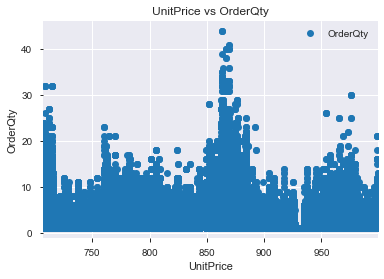

In [8]:
d.plot(x='ProductID', y='OrderQty', style='o')  
plt.title('UnitPrice vs OrderQty')  
plt.xlabel('UnitPrice')  
plt.ylabel('OrderQty')  
plt.show()

CustomerId


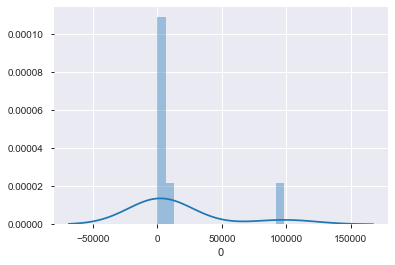

OrderDate


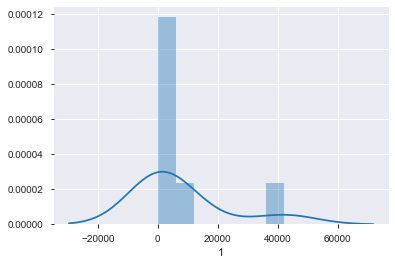

SalesOrderNumber


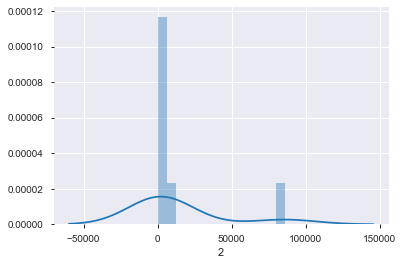

TerritoryID


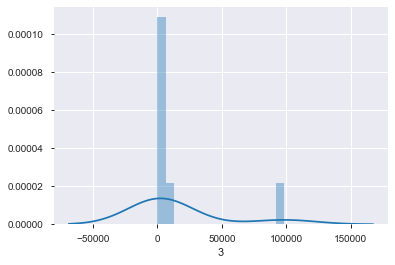

ProductID


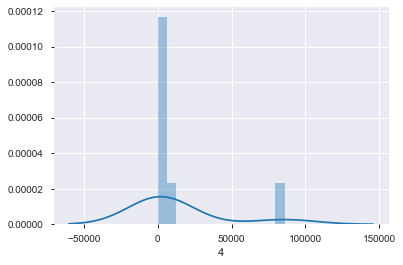

UnitPrice


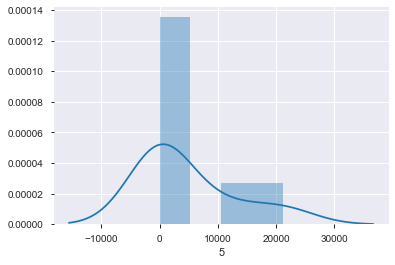

OrderQty


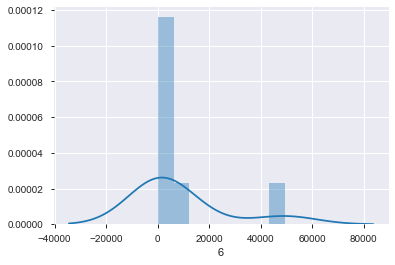

IndexError: index 7 is out of bounds for axis 0 with size 7

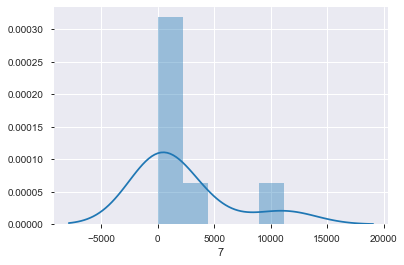

In [9]:
for i in range(len(d)-1):
    sns.distplot(d.iloc[i])
    print(d.columns[i])
    plt.show()

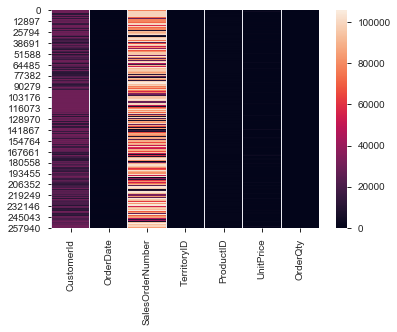

In [10]:
sns.heatmap(d)


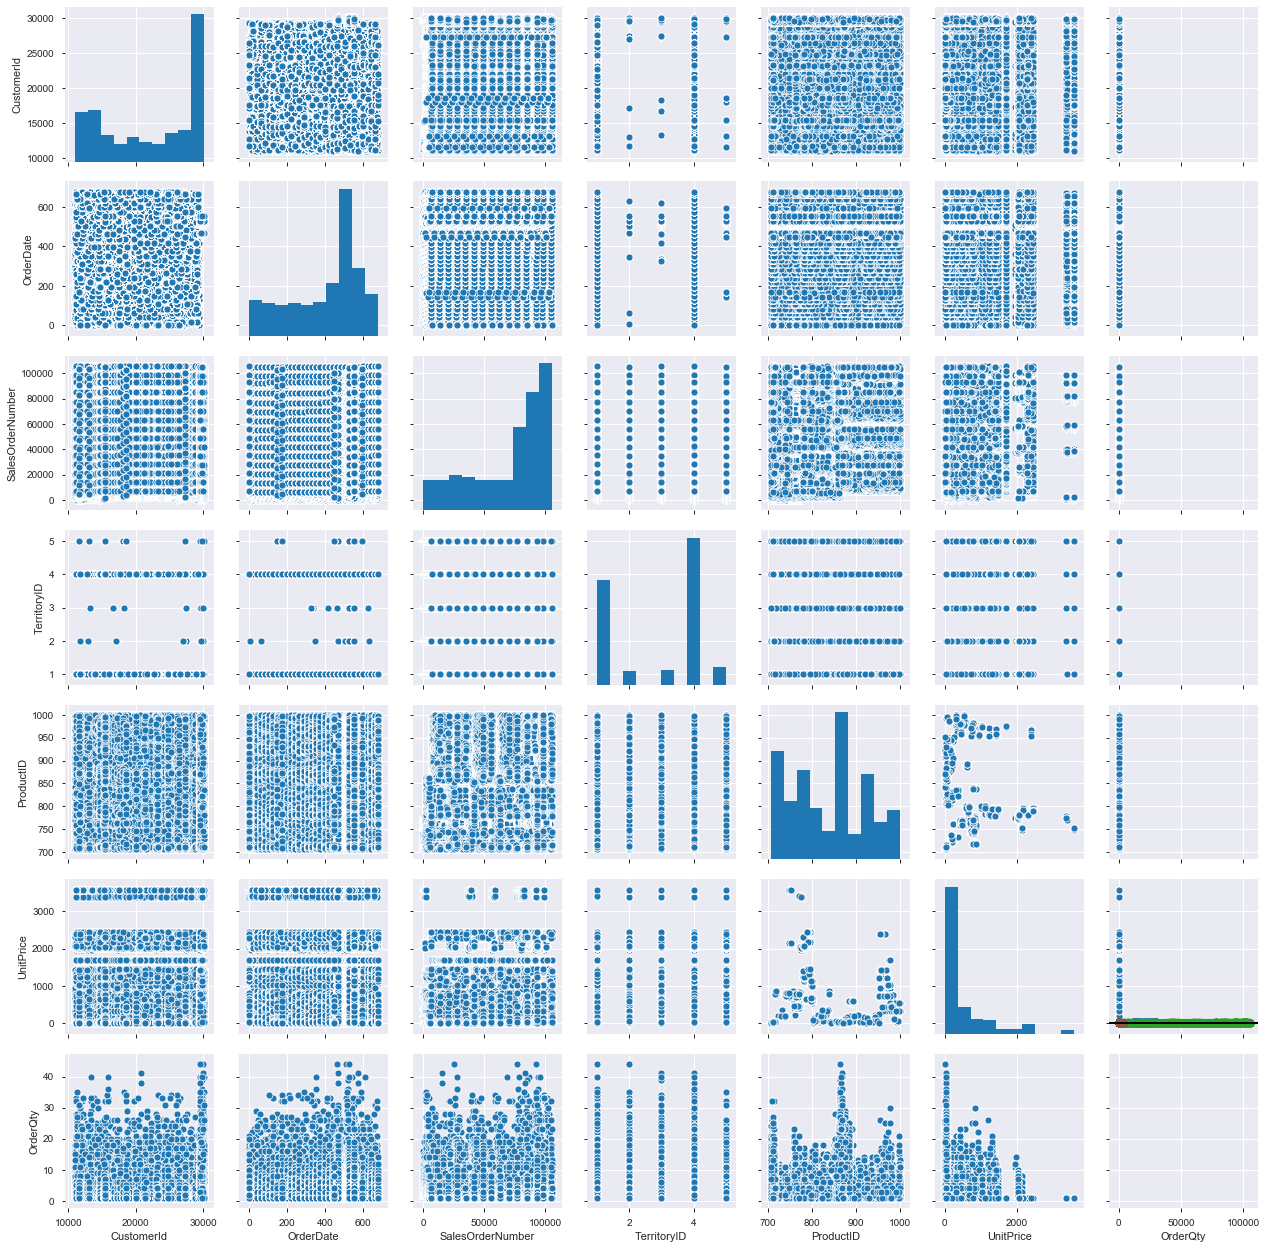

In [11]:
sns.pairplot(d)
mean_target = d['OrderQty'].mean()
l = d.columns
for i in l[:-1]:
    plt.scatter(d[i],d['OrderQty'])
    plt.xlabel(i)
    plt.ylabel('target')
    plt.axhline(mean_target,color='k')

In [ ]:

X=d.iloc[:,0:6]
Y=d.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred1 = dt.predict(X_test)
y_pred1

In [ ]:
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)


In [ ]:
y_pred2 = svr.predict(X_test)


In [ ]:
plt.scatter(X_train, y_train, color = 'magenta')
plt.plot(X_test, svr.predict(X_test), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.show()

In [ ]:
from sklearn.neighbours import KNeighboursRegressor
knn=KNeighborsRegressor(n_neighbors=10,algorithm=’auto’)
knn.fit(X_train,y_train)
y_pred3 = knn.predict(X_test)


In [ ]:
import tensorflow as tf
from tensorflow import keras
model = keras.models.Sequential()

X_train = keras.utils.normalize(x_train,axis=1)
X_test = keras.utils.normalize(x_test,axis=1)


model.add(keras.layers.Flatten(input_shape = d.shape))
model.add(keras.layers.Dense(128,activation = tf.nn.relu))
model.add(keras.layers.Dense(2,activation = tf.nn.softmax))


from tensorflow.keras.layers import Dense
classifier = keras.models.Sequential()
classifier.add(Dense(270817, activation='relu', kernel_initializer='random_normal', input_dim=6))
classifier.add(Dense(2100, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(800, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(40, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))


classifier.compile(optimizer ='sgd',loss='squared_hinge', metrics =['accuracy'])
classifier.fit(X_train,X_train, batch_size=10, epochs=10)

eval_model=classifier.evaluate(X_train, Y_train)
eval_model